In [ ]:
"""
                               MOVIE RECOMMENDATION SYSTEM USING KNN ALGORITHMS.
                        
    K-NEAREST NEIGHBOUR[KNN]:It is one of the best simplest machine learning algorithm based on supervised learning techniques
         which stores all the available data and classifies a new data point based on the similarity,it is mostly used for 
         the classification problem.
                        
                                USER<-->seen by users<-->similar movie<-->USER 
                                
                                                 OUR WORKING MODEL:
                                      DATA<-->PRE-PROCESSING<-->TRAIN-MODEL<-->RESULTS 
                                      
            FEATURES ABOUT DATASETS:::
              => Here basically we use two data sets one is movie and another is rating about each movie.
              MOVIE DATA-SETS========================
              1.MovieId -> All the movie have assigned some special id's.
              2.Title -> Name of Movie.
              3.Genres -> All the movie have have some genres like type of movie i.e romantic,adventure,science-fiction etc.
              RATING DATA-SETS=======================
              1.User ID -> All the user's have some user id which gives rating to that particular movie.
              2.MovieId -> All the movie have assigned some special id's.
              3.Rating -> All the movie must have some rating according to user's choice.
              4.Timestamp -> It denotes the date and time.                               
"""

In [40]:
#importing useful python library:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import warnings
warnings.filterwarnings('ignore')

In [41]:
#assign the datasets to variable

movies=pd.read_csv("movies.csv")
rating=pd.read_csv("ratings.csv")

In [4]:
#view the datasets:

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
#check the datatype of both data-sets:

movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [7]:
rating.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [9]:
#check the shape of each data-sets:

movies.shape

(9742, 3)

In [10]:
rating.shape

(100836, 4)

In [11]:
#checking for duplicate values:

movies.duplicated().sum()

0

In [12]:
rating.duplicated().sum()

0

In [13]:
#checking for null values:

movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [14]:
rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

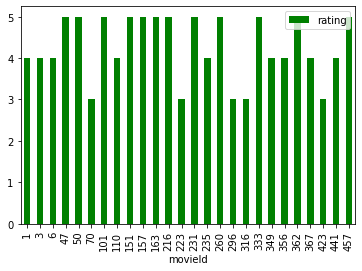

In [19]:
#check the graph of rating for a particular movie_id:

rating.loc[0:25].plot(kind='bar',x='movieId',y='rating',color='green')
plt.show()

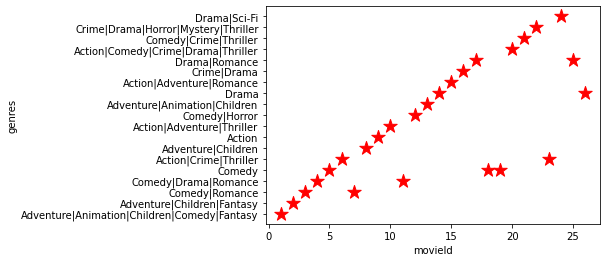

In [25]:
#check the graph of rating for a particular movie_id:

movies.loc[0:25].plot(kind='scatter',marker="*",x='movieId',y='genres',color='red',s=200)
plt.show()

In [26]:
#now we have to remove some column which is not in our use:

movies=movies[['movieId','title']]

In [27]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [28]:
rating=rating[['userId','movieId','rating']]

In [29]:
rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [30]:
#ckecking the shape of newly created datasets after removing some column:

movies.shape

(9742, 2)

In [31]:
rating.shape

(100836, 3)

In [32]:
#Now we are going to change the shape of our datasets, using moviId as index and userId as column we make a matrix and fill
# all the values within appropriate index as rating.

rating.pivot(index='movieId',columns='userId',values='rating')

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# now we are going to fill all null values with 0

rating.pivot(index='movieId',columns='userId',values='rating').fillna(0)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#assigning this data-sets to a new variable:

movies_user=rating.pivot(index='movieId',columns='userId',values='rating').fillna(0)
movies_user.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#creating csr_matrix of newly created matrix i.e movies_user

mat_movies=csr_matrix(movies_user.values)

In [38]:
#now we are going to fit model and using brute techniques traverse each and every elements of the csr_matrix and
# also demonstrate the cosine similarities

model=NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=20)
model.fit(mat_movies)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [43]:
#now we are going to apply KNN algorithm for my final recommendation system:

def recommender(movie_name,data,model,n_recommendation):
    model.fit(data)
    idx=process.extractOne(movie_name,movies['title'])[2]
    print('Movies selected: ',movies['title'][idx],'Index: ',idx)
    print('Searching foe similar movies:=========================')
    distances,indices=model.kneighbors(data[idx],n_neighbors=n_recommendation)
    for i in indices:
        print(movies['title'][i].where(i!=idx))

In [44]:
#Testing our model:

recommender('Jumanji (1995)',mat_movies,model,20)

Movies selected:  Jumanji (1995) Index:  1
Searching foe similar movies:=========================
1                                                    NaN
322                                Lion King, The (1994)
436                                Mrs. Doubtfire (1993)
325                                     Mask, The (1994)
418                                 Jurassic Park (1993)
504                                    Home Alone (1990)
483               Nightmare Before Christmas, The (1993)
506                                       Aladdin (1992)
512                          Beauty and the Beast (1991)
18                 Ace Ventura: When Nature Calls (1995)
276                             Santa Clause, The (1994)
131                                        Casper (1995)
275                                      Stargate (1994)
176                                    Waterworld (1995)
337                                     True Lies (1994)
334                                         Spe

In [45]:
#Testing our model:

recommender('Waiting to Exhale (1995)',mat_movies,model,20)

Movies selected:  Waiting to Exhale (1995) Index:  3
Searching foe similar movies:=========================
3                                                  NaN
100                            Before and After (1996)
282                              Sum of Us, The (1994)
160                                    Reckless (1995)
218                          Jefferson in Paris (1995)
586    Haunted World of Edward D. Wood Jr., The (1996)
187                                   Cure, The (1995)
747                            Nothing Personal (1995)
752                                       Bliss (1997)
209                                       Gordy (1995)
612                         Spirits of the Dead (1968)
294                           Walking Dead, The (1995)
50                                      Georgia (1995)
248                          Nina Takes a Lover (1994)
445                              Poetic Justice (1993)
351                                Federal Hill (1994)
317         